-------------------------------------------------------------------
 ## NAMA  : SHAFIRA OCTAFIA
 ## NIM      : 2109106023
 
 ## POSTTEST 6 Unsupervised Learning Kecerdasan  Buatan
--------------------------------------------------------------------

--------------------------
### IMPORT LIBRARY  
--------------------------

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [35]:
warnings.filterwarnings('ignore')

-------------------------------
### Unsepervised Learning
-------------------------------

In [36]:
df = pd.read_csv("HRDatasetv14.csv")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [38]:
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


-------------------------------------------------------------------
### Mengecek apakah ada daya yang duplicate
### Ternyata di dataset saya tidak ada data dupicate, namun memiliki nilai NULL, Maka dari itu perlu dilakukan Cleaning Data
-------------------------------------------------------------------

In [39]:
df[df.duplicated()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [40]:
print("----------------------------------------------------------")
print("      Tampilan Dataset Sebelum dilakukan Data Cleaning    ")
print("----------------------------------------------------------")
df.isna().sum()

----------------------------------------------------------
      Tampilan Dataset Sebelum dilakukan Data Cleaning    
----------------------------------------------------------


Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

--------------------------------------------------------
### Menghapus Nilai NULL Pada Tipe Data Object
--------------------------------------------------------

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
simpleImptObj = SimpleImputer(strategy = 'most_frequent')

In [43]:
df['DateofTermination'] = simpleImptObj.fit_transform(df[['DateofTermination']])

-------------------------------------------------------
### Menghapus Nilai NULL Pada Tipe Data Float
-------------------------------------------------------

In [44]:
simpleImptFloat = SimpleImputer(strategy = 'mean')

In [45]:
df['ManagerID'] = simpleImptObj.fit_transform(df[['ManagerID']])

In [46]:
print("----------------------------------------------------------")
print("      Tampilan Dataset Setelah dilakukan Data Cleaning    ")
print("----------------------------------------------------------")
df.isna().sum()

----------------------------------------------------------
      Tampilan Dataset Setelah dilakukan Data Cleaning    
----------------------------------------------------------


Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

------------------------------
### Subset & Data Scaling
------------------------------

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
df_subset = df[['DeptID', 'Absences']]

In [49]:
ss = StandardScaler()

In [50]:
x_scaled = ss.fit_transform(df_subset)

----------------------------
### K-Means Clustering
----------------------------

In [51]:
from sklearn.cluster import KMeans

In [52]:
model_Kmeans = KMeans(n_clusters = 3)

In [53]:
model_Kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [54]:
print(x_scaled)

[[ 0.35966694 -1.58097881]
 [-1.4891995   1.15725668]
 [ 0.35966694 -1.23869937]
 [ 0.35966694  0.81497724]
 [ 0.35966694 -1.40983909]
 [ 0.35966694  0.81497724]
 [-0.56476628  1.49953611]
 [ 0.35966694  1.49953611]
 [ 0.35966694 -1.06755965]
 [-1.4891995   0.98611696]
 [ 0.35966694  0.30155809]
 [ 0.35966694  0.81497724]
 [-1.4891995  -0.21186107]
 [ 0.35966694 -0.5541405 ]
 [ 0.35966694 -1.58097881]
 [ 0.35966694  1.67067583]
 [ 0.35966694  0.98611696]
 [ 0.35966694  0.30155809]
 [-1.4891995  -0.38300078]
 [ 0.35966694  0.47269781]
 [ 0.35966694  0.47269781]
 [ 0.35966694 -1.40983909]
 [ 0.35966694  1.49953611]
 [ 0.35966694 -1.23869937]
 [ 0.35966694 -0.89641994]
 [-1.4891995  -1.40983909]
 [-3.33806594 -1.06755965]
 [ 0.35966694  0.64383752]
 [ 0.35966694 -0.72528022]
 [-3.33806594  0.64383752]
 [ 0.35966694 -0.21186107]
 [ 0.35966694  1.15725668]
 [ 1.28410017  1.49953611]
 [ 0.35966694 -1.23869937]
 [ 0.35966694  0.81497724]
 [-0.56476628 -1.06755965]
 [ 0.35966694  0.64383752]
 

In [55]:
labels = model_Kmeans.labels_

In [56]:
print(labels)

[2 1 2 0 2 0 0 0 2 1 0 0 1 2 2 0 0 0 1 0 0 2 0 2 2 1 1 0 2 1 2 0 0 2 0 2 0
 2 0 1 2 0 1 0 2 0 2 2 1 2 2 2 2 0 2 0 2 1 0 1 2 1 2 2 2 0 2 2 2 2 1 2 0 2
 0 1 1 0 2 2 2 2 2 2 0 0 0 0 2 0 0 1 0 0 2 2 1 1 2 1 2 0 0 2 2 0 2 0 1 1 2
 2 2 1 0 2 2 2 2 0 1 0 0 0 2 2 2 0 2 0 1 0 1 2 2 2 0 2 0 2 2 0 2 2 1 2 2 2
 2 0 1 0 2 2 0 0 1 2 0 0 1 0 1 0 1 2 0 0 0 2 1 0 0 2 0 0 0 2 0 0 0 2 0 0 2
 0 2 2 2 0 1 2 0 1 0 0 0 1 0 2 0 0 2 2 2 2 0 2 0 2 0 2 0 1 0 2 2 0 2 0 1 0
 0 2 0 0 0 1 1 0 2 0 0 2 0 0 0 2 1 1 1 2 2 1 1 2 2 2 0 1 2 0 1 0 1 1 0 2 0
 1 0 1 1 0 0 0 2 2 1 2 0 0 2 0 2 1 0 2 0 2 0 2 2 0 1 2 2 1 0 0 0 0 1 0 2 2
 2 0 1 1 0 2 2 0 2 0 0 2 1 1 2]


----------------------------------------------------------
### Cross_Tab untuk membandingkan antar Cluster
----------------------------------------------------------

In [57]:
df_Kmeans = pd.DataFrame({'labels' : labels, 'Department' : df.Department})

In [58]:
ct1 = pd.crosstab(df_Kmeans['labels'], df_Kmeans['Department'])
print(ct1)

Department  Admin Offices  Executive Office  IT/IS  Production         Sales  \
labels                                                                         
0                       0                 0      0                105     16   
1                       9                 1     50                  0      0   
2                       0                 0      0                104     15   

Department  Software Engineering  
labels                            
0                              4  
1                              1  
2                              6  


--------------------------------
### Untuk Melihat Centroid
---------------------------------

In [59]:
plt.style.use('ggplot')

In [60]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [61]:
centroids = model_Kmeans.cluster_centers_

In [62]:
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

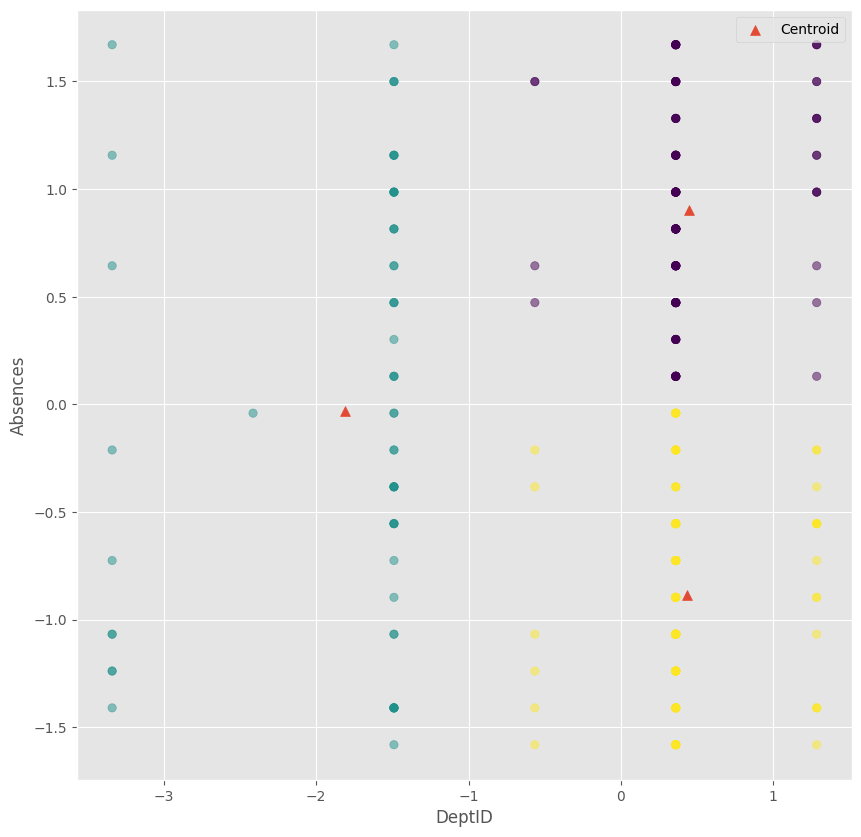

In [86]:
plt.figure (figsize =(10,10))

plt.scatter(xs, ys, alpha = 0.5, c= labels)

plt.scatter(centroids_x, centroids_y, label = "Centroid", marker="^", s=50)

plt.xlabel ('DeptID')
plt.ylabel ('Absences')

plt.legend()
plt.show()


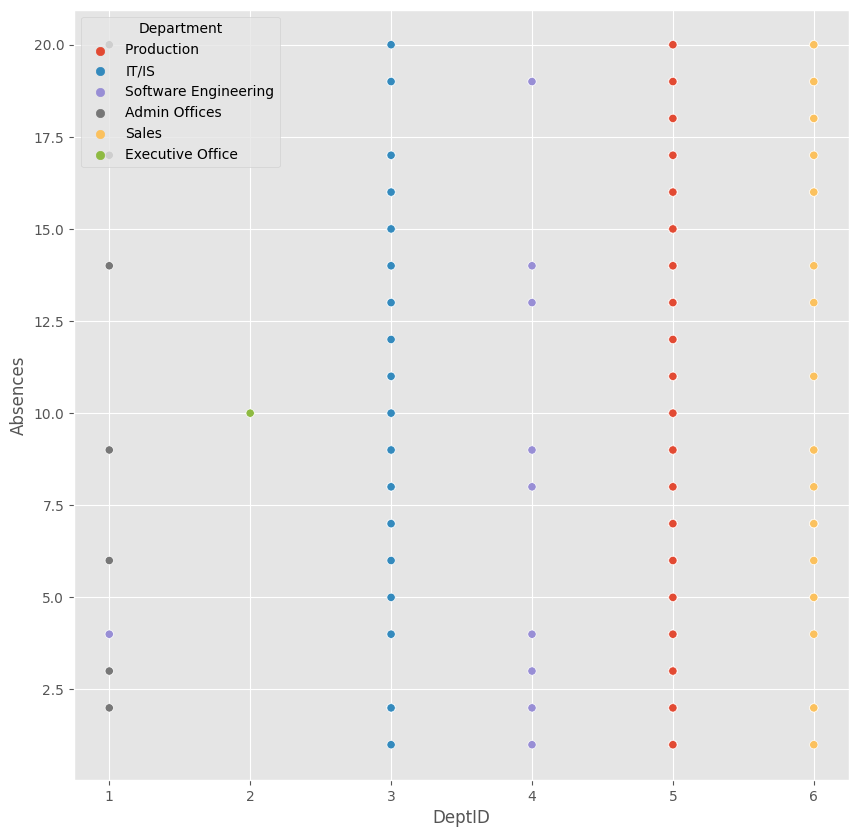

In [84]:
plt.figure (figsize =(10,10))
df_aktual = df[["DeptID", "Absences", "Department"]]
sns.scatterplot(x = "DeptID", y = "Absences", data = df_aktual, hue = "Department")
plt.show()

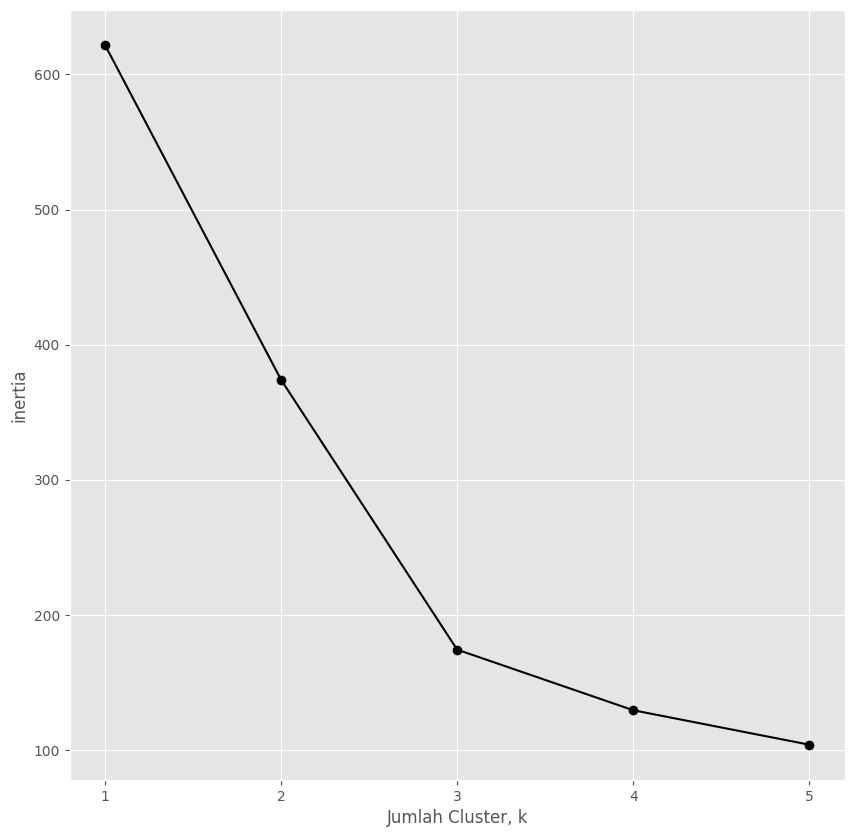

In [74]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    

plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o', 
color = "black")
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

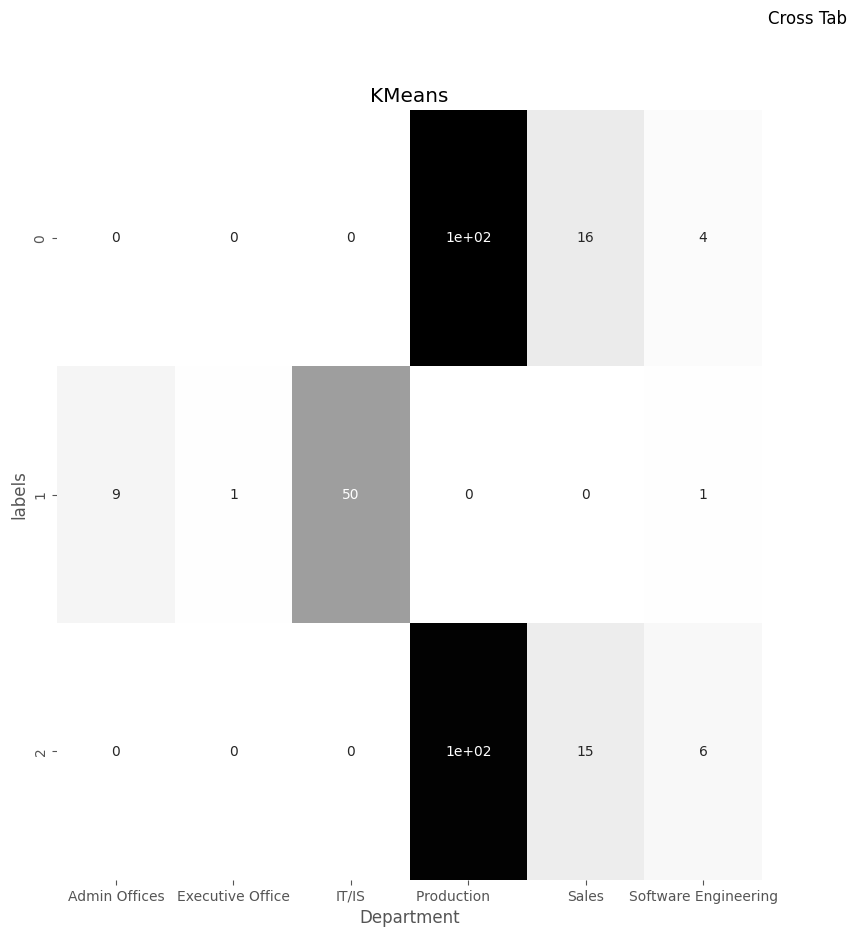

In [91]:
plt.figure(figsize=(20,10))
plt.suptitle("Cross Tab")

plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1, annot=True, cbar=False, cmap="Greys")

plt.show()